In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
import tensorflow 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
traindir = "/content/gdrive/MyDrive/New_Plant/Train"
validdir = "/content/gdrive/MyDrive/New_Plant/Valid"
testdir = "/content/gdrive/MyDrive/New_Plant/Test"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 30
training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

test_set = test_datagen.flow_from_directory(testdir,
                                            target_size=(224, 224),
                                            batch_size=3,
                                            class_mode='categorical')


Found 9603 images belonging to 5 classes.
Found 2401 images belonging to 5 classes.
Found 12 images belonging to 5 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Pepper,_bell___Bacterial_spot': 0, 'Pepper,_bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4}


In [ ]:
base_model=VGG16(include_top=False,weights= 'imagenet',input_shape=(224,224,3))
base_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
last_output = base_model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=outputs)
# model = Sequential()
# model.add(base_model)
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# classifier=keras.models.Sequential()
# classifier.add(base_model)
# classifier.add(Flatten())
# classifier.add(Dense(5,activation='softmax'))
# classifier.summary()

In [ ]:
# classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
# model_name = "model3.h5"
# checkpoint = ModelCheckpoint(model_name,
#                             monitor="val_loss",
#                             mode="min",
#                             save_best_only = True,
#                             verbose=1)

# earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [ ]:
# try:
#     history = model.fit(training_set,
#                         epochs=10,
#                         validation_data=valid_set,
#                         callbacks=[checkpoint,earlystopping])
# except KeyboardInterrupt:
#     print("\nTraining Stopped")

Epoch 1/10
321/321 [==============================] - ETA: 0s - loss: 0.8683 - accuracy: 0.6821
Epoch 1: val_loss improved from inf to 0.40015, saving model to model3.h5
321/321 [==============================] - 2374s 7s/step - loss: 0.8683 - accuracy: 0.6821 - val_loss: 0.4002 - val_accuracy: 0.8838
Epoch 2/10
321/321 [==============================] - ETA: 0s - loss: 0.4581 - accuracy: 0.8336
Epoch 2: val_loss improved from 0.40015 to 0.29026, saving model to model3.h5
321/321 [==============================] - 169s 527ms/step - loss: 0.4581 - accuracy: 0.8336 - val_loss: 0.2903 - val_accuracy: 0.9055
Epoch 3/10
321/321 [==============================] - ETA: 0s - loss: 0.3784 - accuracy: 0.8597
Epoch 3: val_loss improved from 0.29026 to 0.24109, saving model to model3.h5
321/321 [==============================] - 165s 513ms/step - loss: 0.3784 - accuracy: 0.8597 - val_loss: 0.2411 - val_accuracy: 0.9138
Epoch 4/10
321/321 [==============================] - ETA: 0s - loss: 0.3332 - 

In [ ]:
#fitting images to CNN
# history = model.fit(training_set,steps_per_epoch=train_num//batch_size,validation_data=valid_set,epochs=2,validation_steps=valid_num//batch_size)

In [ ]:
# model.save('/content/gdrive/MyDrive/model3.h5')

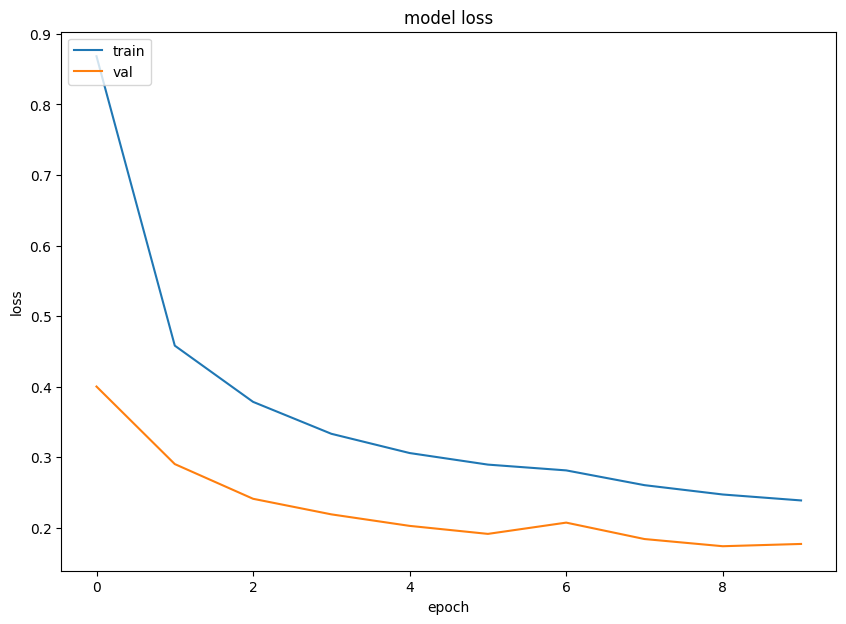

In [ ]:
# plt.figure(figsize=(10,7))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

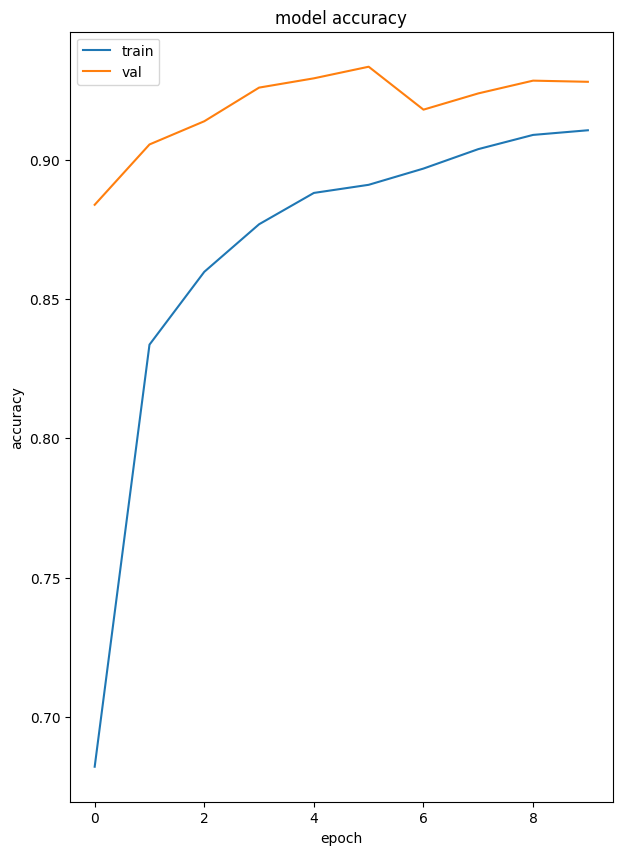

In [ ]:
# plt.figure(figsize=(7,10))
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

In [ ]:
# y_test = validation_generator.classes
# y_pred = model.predict(validation_generator)
# y_pred = np.argmax(y_pred,axis=1)

In [ ]:
li = list(class_dict.keys())
print(li)

['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


Following is our prediction:
1/1 [==============================] - 8s 8s/step


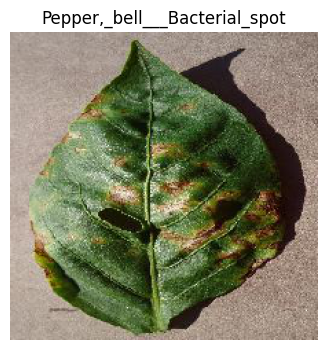

In [ ]:
# predicting an image
from tensorflow.keras.preprocessing import image
import numpy as np
image_path = "/content/gdrive/MyDrive/New_Plant/Test/Pepper,_bell___Bacterial_spot/PepperBell_Bacterial1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [ ]:
import cv2
import numpy as np
import urllib.request
import os

In [ ]:
# # Load the video file
# video_path = '/content/gdrive/MyDrive/Potato Late Blight Preview ClipED.mp4' # modify with your video path
# cap = cv2.VideoCapture(video_path)

# # Loop through the frames from the video
# while cap.isOpened():
#     # Read a frame from the video
#     ret, frame = cap.read()
    
#     if not ret:
#         break
    
#     # Resize the frame to the input shape of your model
#     img = cv2.resize(frame, (224, 224))
    
#     # Preprocess the image to make it compatible with the model
#     img = img.astype('float32') / 255.0
#     img = np.expand_dims(img, axis=0)
    
#     # Pass the image through the model and get the predicted class
#     pred = model.predict(img)
#     class_idx = np.argmax(pred[0])
#     class_name = li[class_idx]
    
#     # Draw the predicted class on the frame
#     cv2.putText(frame, class_name, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
#     # Show the frame with the predicted class
#     from google.colab.patches import cv2_imshow
#     cv2_imshow(frame)
    
#     # Exit the program if the user presses the 'q' key
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
        
# # Release the resources
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# video_path = '/content/gdrive/MyDrive/Potato Late Blight Preview ClipED.mp4' # modify with your video path

# cap = cv2.VideoCapture(video_path)

# # Get the video dimensions and frame rate
# width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = int(cap.get(cv2.CAP_PROP_FPS))

# # Create a video writer to save the predicted frames to a new video file
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('/content/drive/MyDrive/predicted_video.mp4', fourcc, fps, (width, height))

# # Loop through the frames from the video
# while cap.isOpened():
#     # Read a frame from the video
#     ret, frame = cap.read()
    
#     if not ret:
#         break
    
#     # Resize the frame to the input shape of your model
#     img = cv2.resize(frame, (224, 224))
    
#     # Preprocess the image to make it compatible with the model
#     img = img.astype('float32') / 255.0
#     img = np.expand_dims(img, axis=0)
    
#     # Pass the image through the model and get the predicted class
#     pred = model.predict(img)
#     class_idx = np.argmax(pred[0])
#     class_name = categories[class_idx]
    
#     # Draw the predicted class on the frame
#     cv2.putText(frame, class_name, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
#     # Write the predicted frame to the output video file
#     out.write(frame)
    
# # Release the resources
# cap.release()
# out.release()
# cv2.destroyAllWindows()

In [ ]:
model_path = "/content/gdrive/MyDrive/model3.h5"

model=keras.models.load_model(model_path)

# test_datagen = ImageDataGenerator(rescale=1./255)

# test_generator = test_datagen.flow_from_directory(
#         testdir,
#         target_size=(224, 224),
#         batch_size=4,
#         class_mode='categorical',
#         shuffle=False)

# Evaluate the model on the test data
# test_data, test_labels = test_generator.next()

# loss, accuracy = model.evaluate(test_data, test_labels, verbose=2)

# # Make predictions on the test data
# predictions = model.predict(test_data)

# # Convert the predictions to class labels
# predicted_labels = np.argmax(predictions, axis=1)

# # Calculate the F1 score
# f1_score = sklearn.metrics.f1_score(np.argmax(test_labels, axis=1), predicted_labels, average='weighted')

In [ ]:
import sklearn
test_data, test_labels = test_set.next()
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data, test_labels)

# Make predictions on the test data
predictions = model.predict(test_data)

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the F1 score
f1_score = sklearn.metrics.f1_score(np.argmax(test_labels, axis=1), predicted_labels, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"F1 score: {f1_score:.3f}")

1/1 [==============================] - 0s 21ms/step
Accuracy: 0.667
F1 score: 0.667


In [ ]:
# import numpy as np
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score, f1_score
